
Processing U11.SI...


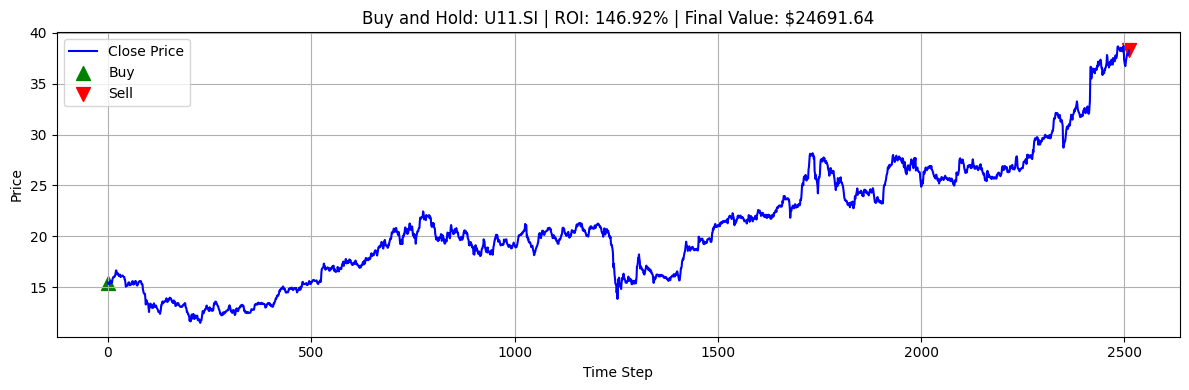


Processing C38U.SI...


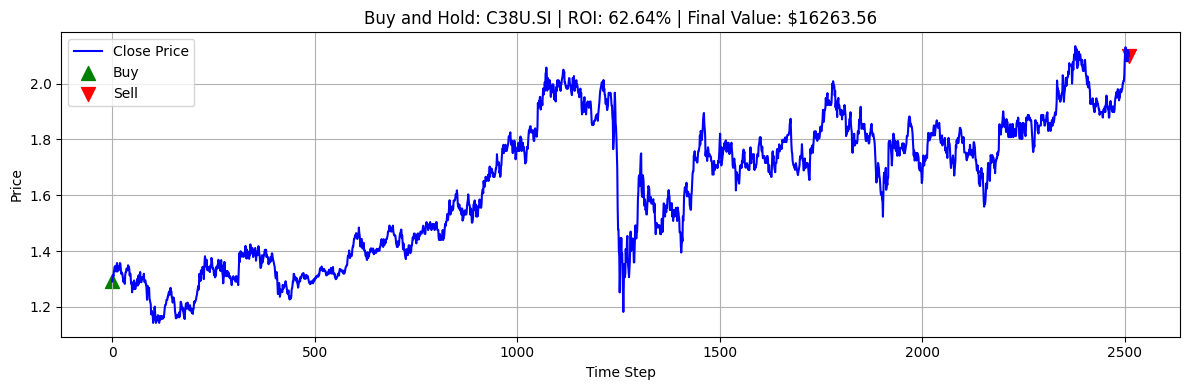


Processing Q0F.SI...


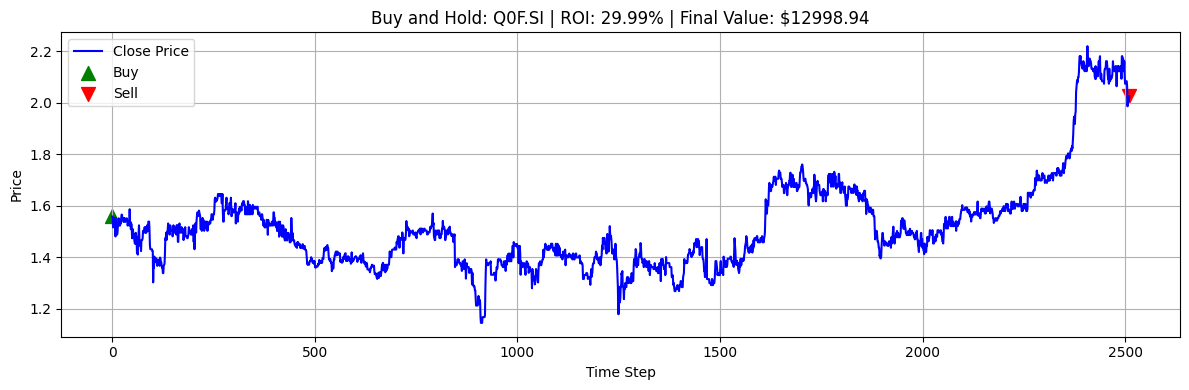


Processing S68.SI...


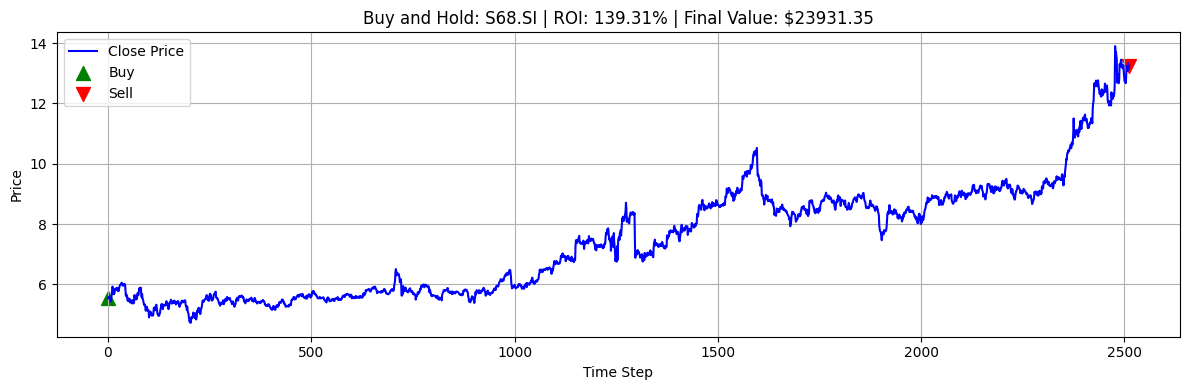


Processing S63.SI...


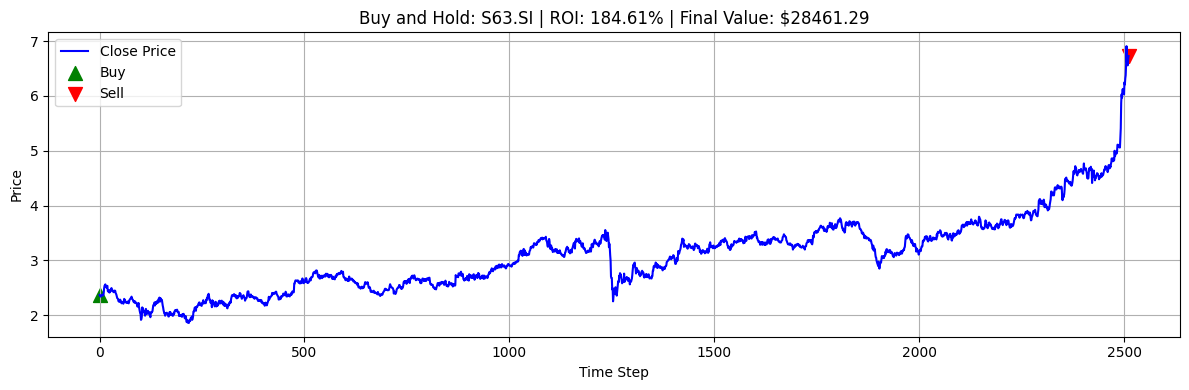


Processing AJBU.SI...


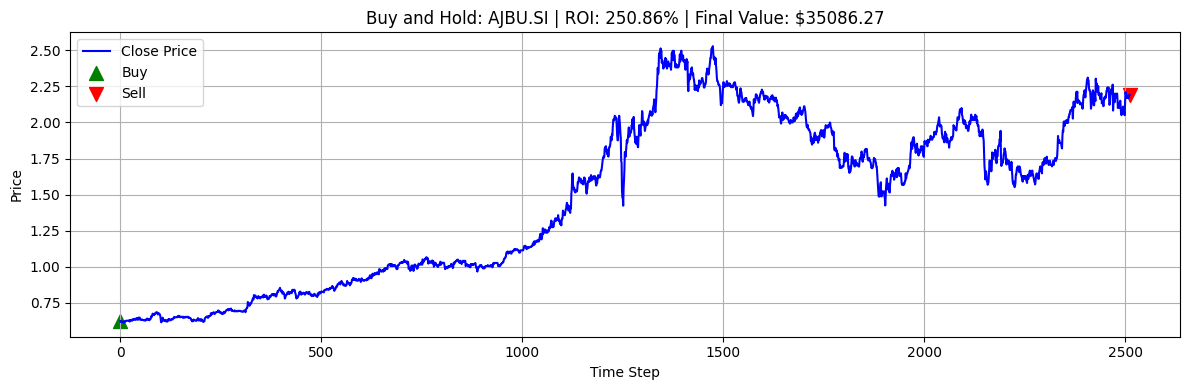


Buy and Hold Summary:
         Buy Price  Sell Price  Shares Held   Final Value     ROI (%)
U11.SI   15.482257   38.259998        645.0  24691.643224  146.916432
C38U.SI   1.291172    2.100000       7744.0  16263.562157   62.635622
Q0F.SI    1.557802    2.025000       6419.0  12998.944819   29.989448
S68.SI    5.536076   13.250000       1806.0  23931.347481  139.313475
S63.SI    2.364596    6.730000       4229.0  28461.294062  184.612941
AJBU.SI   0.624164    2.190000      16021.0  35086.265439  250.862654


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Constants
initial_money = 10000
tickers = {
    "U11.SI": "UOB Bank",
    "C38U.SI": "CapitaLand Integrated Commercial Trust",
    "Q0F.SI": "IHH Healthcare",
    "S68.SI": "SGX",
    "S63.SI": "ST Engineering",
    "AJBU.SI": "Keppel DC REIT"
}

buyhold_results = {}

for ticker in tickers:
    print(f"\nProcessing {ticker}...")
    df = pd.read_csv(f"/home/priya/Desktop/fyp/Agents/data_store/{ticker}.csv")
    close_prices = df["Close"].dropna().values

    if len(close_prices) < 2:
        print(f"Skipping {ticker} due to insufficient data.")
        continue

    # Buy at the first available close, sell at the last
    buy_price = close_prices[0]
    sell_price = close_prices[-1]
    shares = initial_money // buy_price
    leftover_cash = initial_money - (shares * buy_price)
    final_value = shares * sell_price + leftover_cash
    roi = ((final_value - initial_money) / initial_money) * 100

    buyhold_results[ticker] = {
        "Buy Price": buy_price,
        "Sell Price": sell_price,
        "Shares Held": shares,
        "Final Value": final_value,
        "ROI (%)": roi
    }

    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(close_prices, label='Close Price', color='blue')
    plt.scatter(0, buy_price, color='green', label='Buy', marker='^', s=100)
    plt.scatter(len(close_prices) - 1, sell_price, color='red', label='Sell', marker='v', s=100)
    plt.title(f"Buy and Hold: {ticker} | ROI: {roi:.2f}% | Final Value: ${final_value:.2f}")
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Summary DataFrame
results_df = pd.DataFrame(buyhold_results).T
print("\nBuy and Hold Summary:")
print(results_df)
results_df.to_csv("buyhold_results.csv")



Processing U11.SI...


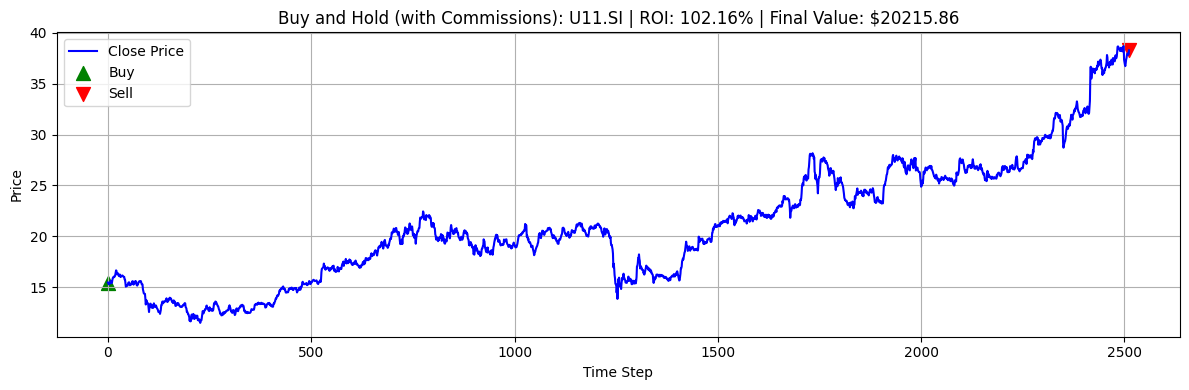


Processing C38U.SI...


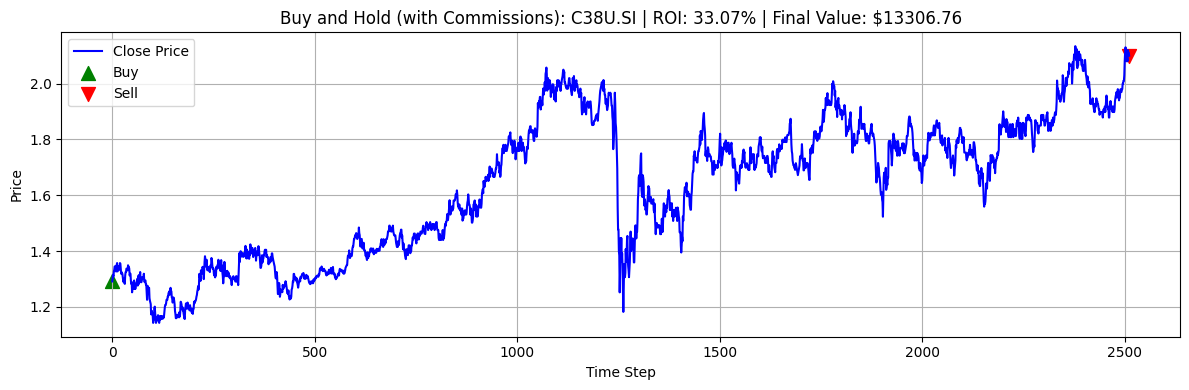


Processing Q0F.SI...


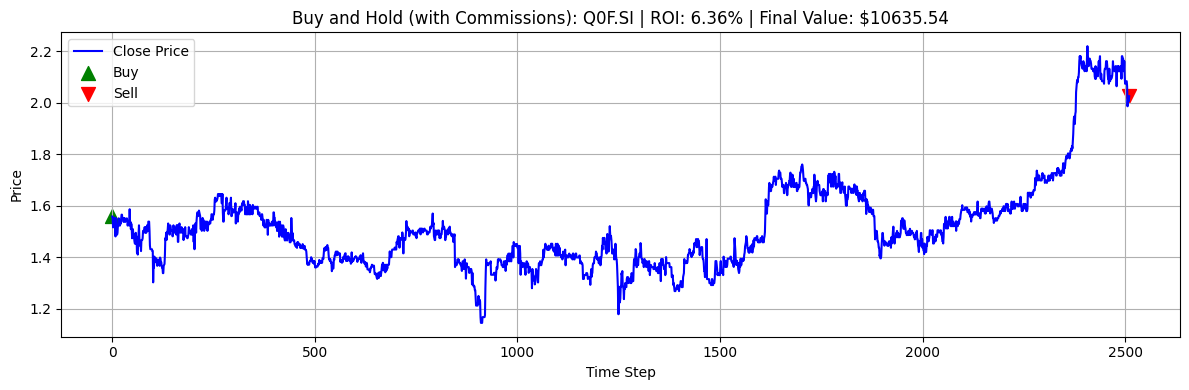


Processing S68.SI...


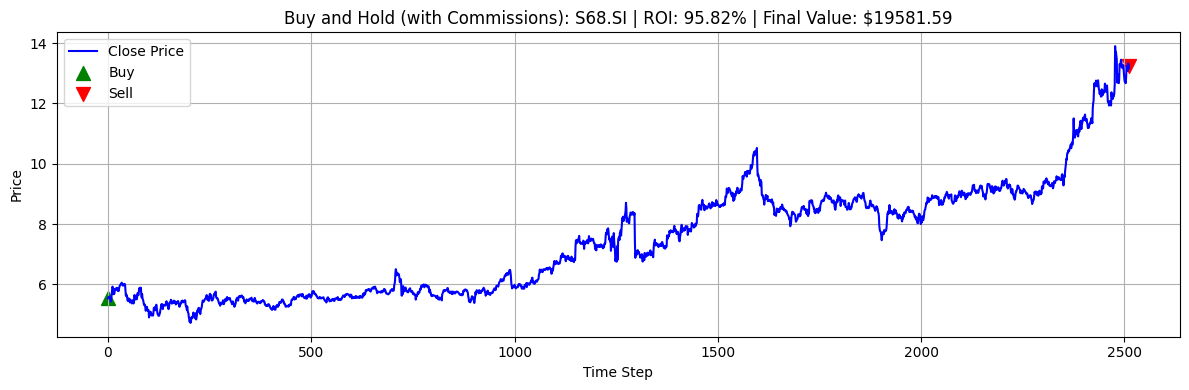


Processing S63.SI...


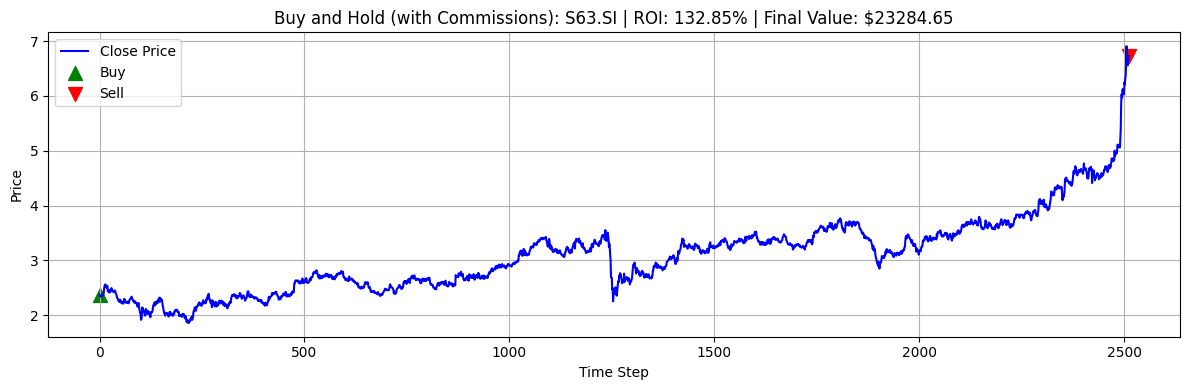


Processing AJBU.SI...


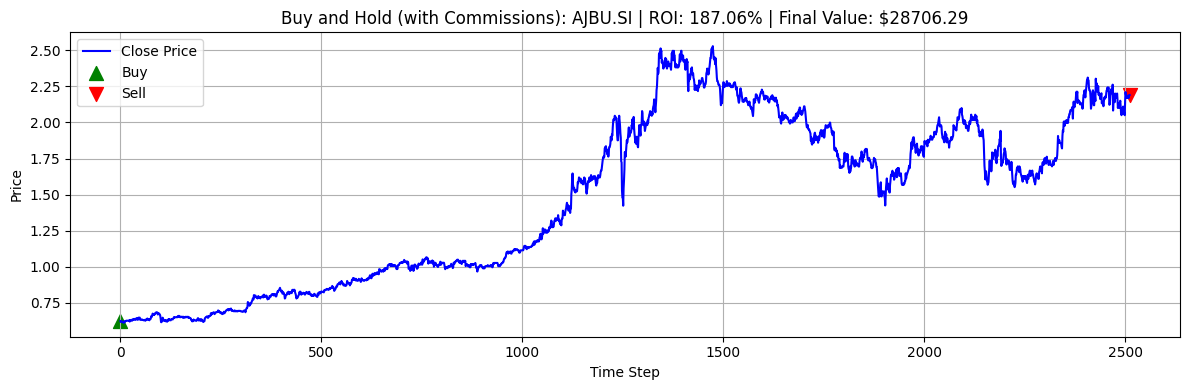


Buy and Hold Summary (with Commissions):
         Buy Price (after commission)  Sell Price (after commission)  \
U11.SI                          17.03                          34.43   
C38U.SI                          1.42                           1.89   
Q0F.SI                           1.71                           1.82   
S68.SI                           6.09                          11.92   
S63.SI                           2.60                           6.06   
AJBU.SI                          0.69                           1.97   

         Shares Held  Final Value  ROI (%)  
U11.SI         587.0     20215.86   102.16  
C38U.SI       7040.0     13306.76    33.07  
Q0F.SI        5835.0     10635.54     6.36  
S68.SI        1642.0     19581.59    95.82  
S63.SI        3844.0     23284.65   132.85  
AJBU.SI      14564.0     28706.29   187.06  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Constants
initial_money = 10000
commission = 0.1  # 0.125%
tickers = {
    "U11.SI": "UOB Bank",
    "C38U.SI": "CapitaLand Integrated Commercial Trust",
    "Q0F.SI": "IHH Healthcare",
    "S68.SI": "SGX",
    "S63.SI": "ST Engineering",
    "AJBU.SI": "Keppel DC REIT"
}

buyhold_results = {}

for ticker in tickers:
    print(f"\nProcessing {ticker}...")
    df = pd.read_csv(f"/home/priya/Desktop/fyp/Agents/data_store/{ticker}.csv")
    close_prices = df["Close"].dropna().values

    if len(close_prices) < 2:
        print(f"Skipping {ticker} due to insufficient data.")
        continue

    buy_price = close_prices[0] * (1 + commission)
    sell_price = close_prices[-1] * (1 - commission)
    shares = initial_money // buy_price
    leftover_cash = initial_money - (shares * buy_price)
    final_value = shares * sell_price + leftover_cash
    roi = ((final_value - initial_money) / initial_money) * 100

    buyhold_results[ticker] = {
        "Buy Price (after commission)": round(buy_price, 2),
        "Sell Price (after commission)": round(sell_price, 2),
        "Shares Held": int(shares),
        "Final Value": round(final_value, 2),
        "ROI (%)": round(roi, 2)
    }

    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(close_prices, label='Close Price', color='blue')
    plt.scatter(0, close_prices[0], color='green', label='Buy', marker='^', s=100)
    plt.scatter(len(close_prices) - 1, close_prices[-1], color='red', label='Sell', marker='v', s=100)
    plt.title(f"Buy and Hold (with Commissions): {ticker} | ROI: {roi:.2f}% | Final Value: ${final_value:.2f}")
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Summary DataFrame
results_df = pd.DataFrame(buyhold_results).T
print("\nBuy and Hold Summary (with Commissions):")
print(results_df)
results_df.to_csv("buyhold_results_with_commission.csv")



Optimizing GA for U11.SI...


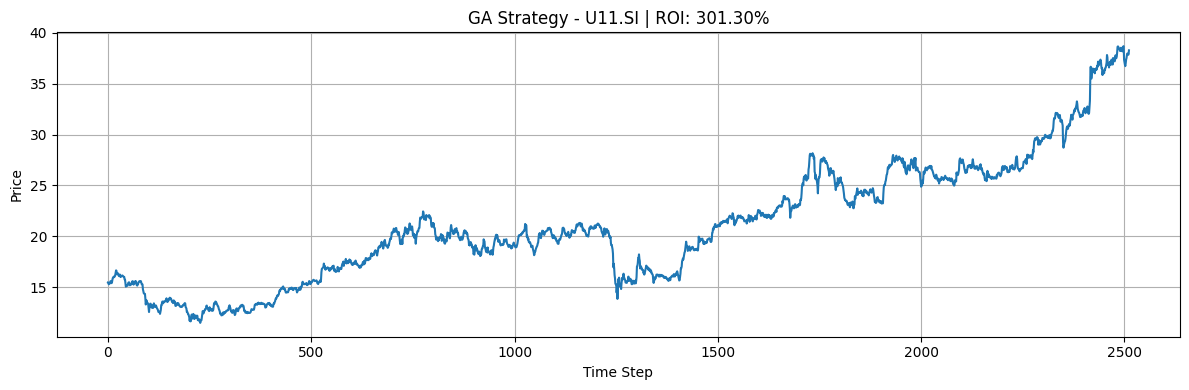


Optimizing GA for C38U.SI...


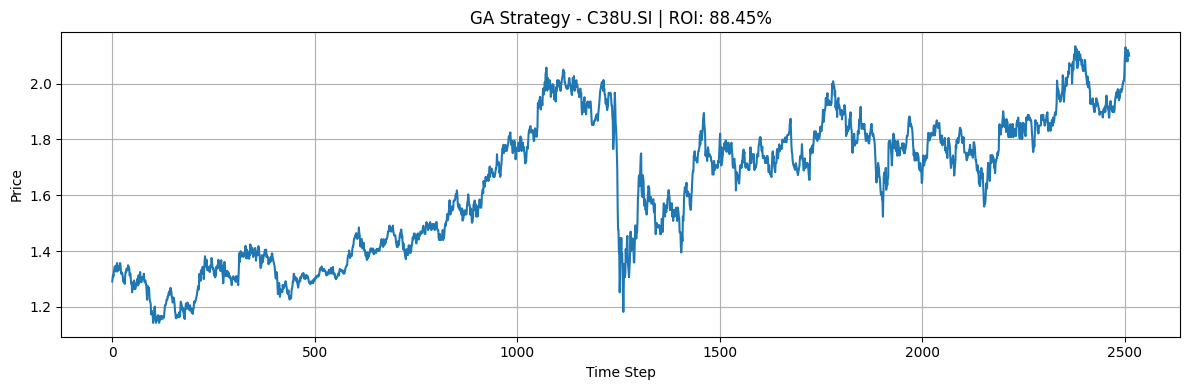


Optimizing GA for Q0F.SI...


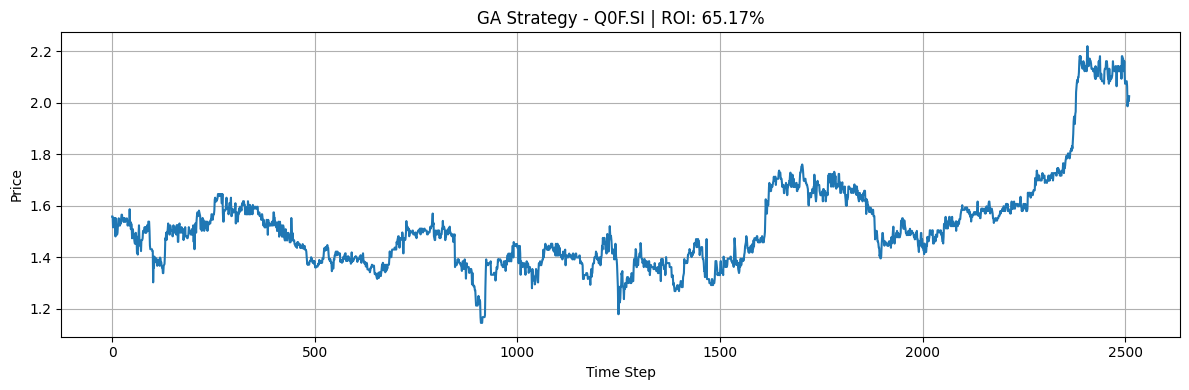


Optimizing GA for S68.SI...


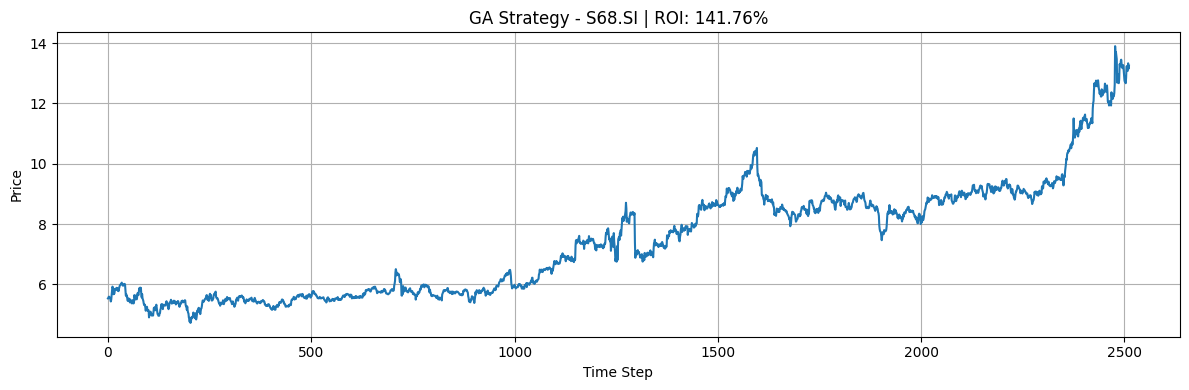


Optimizing GA for S63.SI...


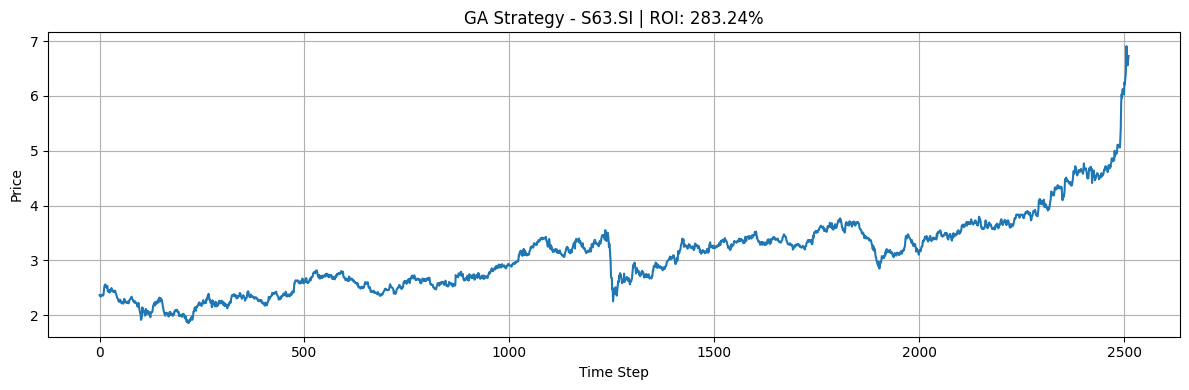


Optimizing GA for AJBU.SI...


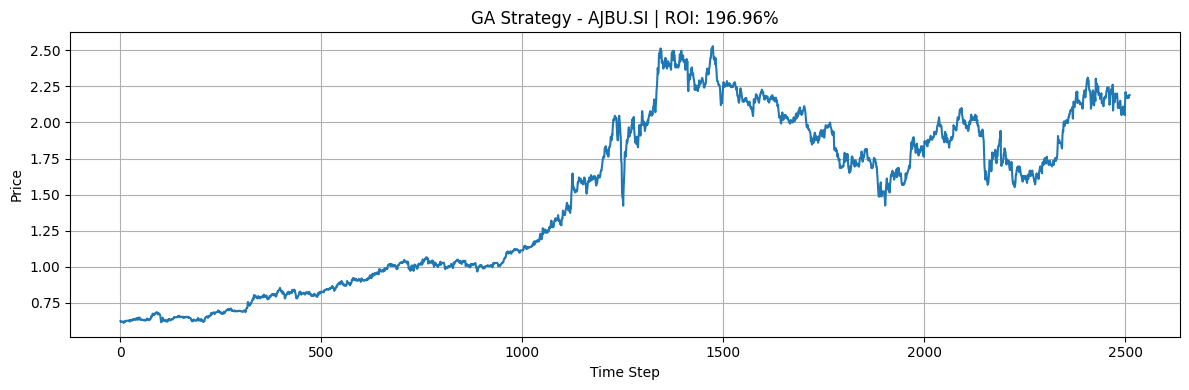


GA Buy & Sell Strategy Summary:
         Best Alpha  Best Beta  Final Value  ROI (%)
U11.SI       0.3605    -0.3869     40130.46   301.30
C38U.SI      0.3106    -0.3520     18845.00    88.45
Q0F.SI       0.3537    -0.3093     16517.38    65.17
S68.SI       0.3615    -0.3602     24175.53   141.76
S63.SI       0.4912    -0.3314     38323.59   283.24
AJBU.SI      0.3358    -0.2571     29695.93   196.96


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
commission = 0.00125
initial_money = 10000
generations = 30
population_size = 20
mutation_rate = 0.1

# Stocks
tickers = {
    "U11.SI": "UOB Bank",
    "C38U.SI": "CapitaLand Integrated Commercial Trust",
    "Q0F.SI": "IHH Healthcare",
    "S68.SI": "SGX",
    "S63.SI": "ST Engineering",
    "AJBU.SI": "Keppel DC REIT"
}

# Technical indicators
def compute_macd(prices, short=12, long=26, signal=9):
    short_ema = pd.Series(prices).ewm(span=short).mean()
    long_ema = pd.Series(prices).ewm(span=long).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal).mean()
    return macd - signal_line

def compute_rsi(prices, period=14):
    delta = np.diff(prices)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=period).mean()
    avg_loss = pd.Series(loss).rolling(window=period).mean()
    rs = avg_gain / (avg_loss + 1e-6)
    rsi = 100 - (100 / (1 + rs))
    return np.concatenate([np.full(period, np.nan), rsi[period:]])

def is_uptrend(prices):
    return np.polyfit(range(len(prices)), prices, 1)[0] > 0

# GA Fitness Function
def fitness(individual, prices):
    alpha, beta = individual
    cash, shares = initial_money, 0
    macd = compute_macd(prices)
    rsi = compute_rsi(prices)

    for t in range(30, len(prices) - 1):
        price = prices[t]
        next_price = prices[t + 1]
        signal = macd[t]
        rsi_val = rsi[t] if not np.isnan(rsi[t]) else 50
        trend = 1 if is_uptrend(prices[t - 10:t + 1]) else -1

        composite_signal = signal + (50 - rsi_val) / 50 + trend
        expected_profit = next_price * (1 - commission) - price * (1 + commission)

        if composite_signal > alpha and expected_profit > 0 and cash >= price * (1 + commission):
            units = cash // (price * (1 + commission))
            cash -= units * price * (1 + commission)
            shares += units

        elif composite_signal < beta and shares > 0:
            cash += shares * price * (1 - commission)
            shares = 0

    final_value = cash + shares * prices[-1]
    return final_value

# GA Optimizer
def run_ga(prices):
    population = [(random.uniform(0, 1), random.uniform(-1, 0)) for _ in range(population_size)]

    for _ in range(generations):
        scores = [fitness(ind, prices) for ind in population]
        sorted_indices = np.argsort(scores)[-population_size // 2:]
        survivors = [population[i] for i in sorted_indices]

        # Crossover + Mutation
        children = []
        while len(children) < population_size:
            p1, p2 = random.sample(survivors, 2)
            child = ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)
            if random.random() < mutation_rate:
                child = (
                    child[0] + np.random.normal(0, 0.05),
                    child[1] + np.random.normal(0, 0.05)
                )
            children.append(child)

        population = survivors + children[:population_size - len(survivors)]

    best = max(population, key=lambda x: fitness(x, prices))
    return best, fitness(best, prices)

# Run strategy on all stocks
ga_results = {}

for ticker in tickers:
    print(f"\nOptimizing GA for {ticker}...")
    df = pd.read_csv(f"/home/priya/Desktop/fyp/Agents/data_store/{ticker}.csv")
    prices = df['Close'].dropna().values

    if len(prices) < 100:
        print("Insufficient data. Skipping.")
        continue

    best_params, final_val = run_ga(prices)
    roi = (final_val - initial_money) / initial_money * 100

    ga_results[ticker] = {
        "Best Alpha": round(best_params[0], 4),
        "Best Beta": round(best_params[1], 4),
        "Final Value": round(final_val, 2),
        "ROI (%)": round(roi, 2)
    }

    # Optional: Visual representation
    plt.figure(figsize=(12, 4))
    plt.plot(prices, label="Price")
    plt.title(f"GA Strategy - {ticker} | ROI: {roi:.2f}%")
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Save results
summary_df = pd.DataFrame(ga_results).T
print("\nGA Buy & Sell Strategy Summary:")
print(summary_df)
summary_df.to_csv("ga_buyhold_strategy_results.csv")
